# Image Convolutions

A convolution is a matrix operation applied to an image using a small kernel matrix. In this notebook you can see the effects of various convolution kernels on an image.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import requests

In [2]:
# Run this to install opencv (cv2)
# !pip install opencv-python

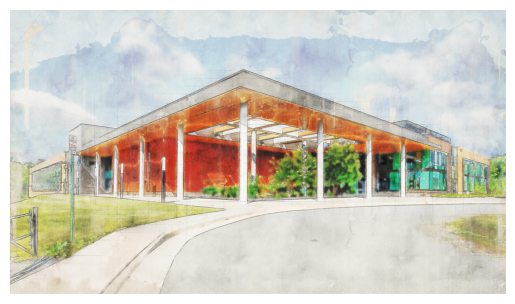

In [4]:
url = "https://cmsv2-assets.apptegy.net/uploads/22048/file/3278635/px2560_d4607619-5133-4c6a-9855-fd028f169ae6.png"
resp = requests.get(url)
image_array = np.asarray(bytearray(resp.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Check if image was decoded successfully
if image is not None:
    #Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("Error: Failed to decode image")


In [8]:
cv2.imwrite("acl.png", image);

In [9]:
image.shape # pyright: ignore[reportOptionalMemberAccess]

(367, 640, 3)

In [10]:
# Compute new dimensions (25% of original)
scale = 0.25  # 25% of original size
new_width = int(image.shape[1] * scale)
new_height = int(image.shape[0] * scale)
new_dim = (new_width, new_height)

# Resize image
image = cv2.resize(image, new_dim, interpolation=cv2.INTER_AREA)

In [14]:
kernel = [[np.zeros([3,3], dtype = np.float16) for _ in range(3)] for _ in range(3)]

kernel[0][0] = np.array([[ 0, 0,  0],
                        [0,  1,  0],
                        [ 0, 0,  0]])

kernel[0][1] = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

## add kernels here -- experiment!

In [16]:
np.sum(kernel)

np.float64(6.0)

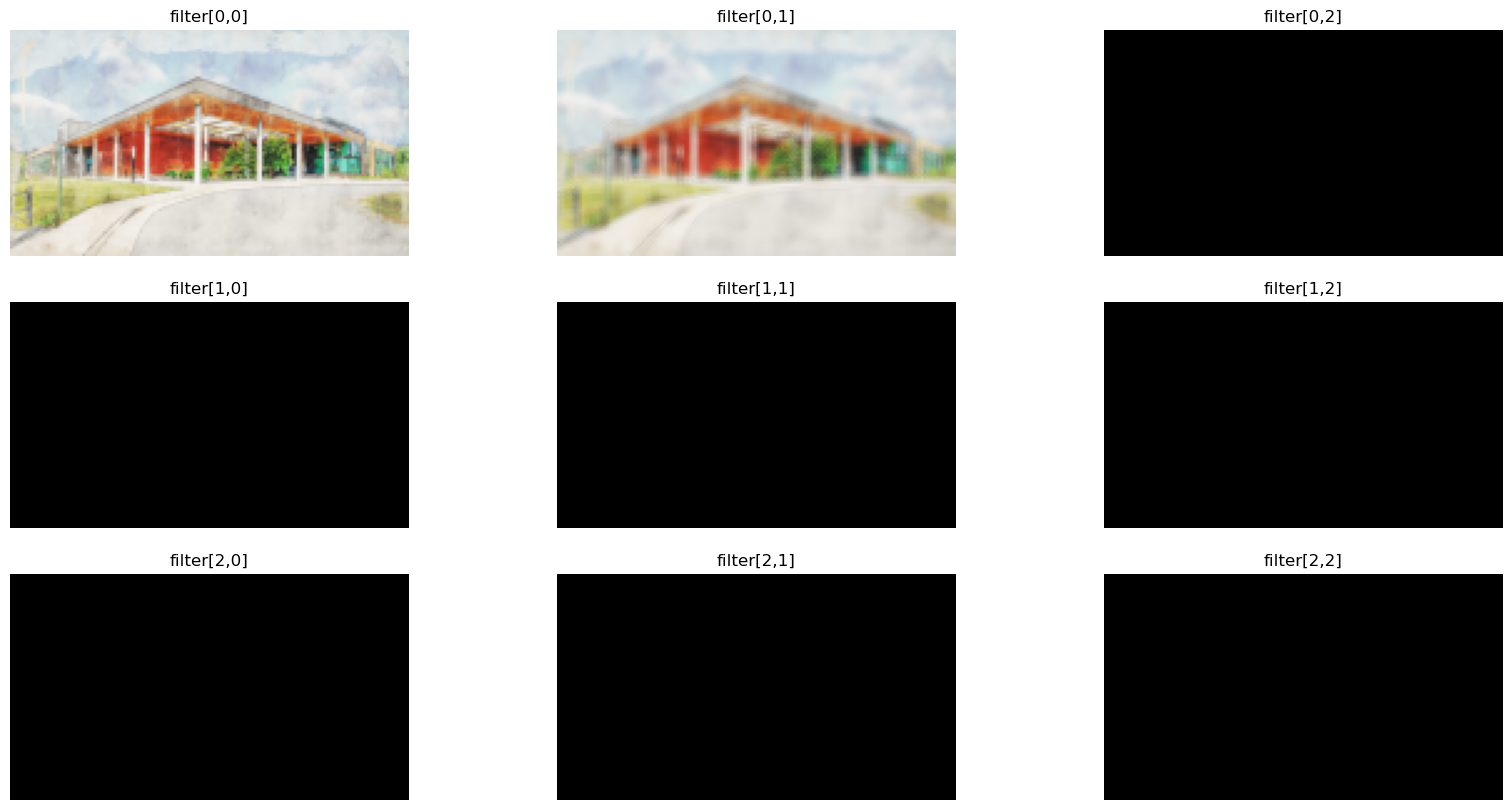

In [21]:
# Display the result
plt.figure(figsize=(20,10))
for r in range(3):
    for c in range(3):
        filtered_image = cv2.filter2D(image, -1, kernel[r][c] / (0.00001 + np.sum(kernel[r][c])))
        plt.subplot(3,3,3*r+c+1)
        plt.imshow(filtered_image)
        plt.axis("off")
        plt.title(f"filter[{r},{c}]")
plt.show()

The cell below plots a large image so you can see your filter better.

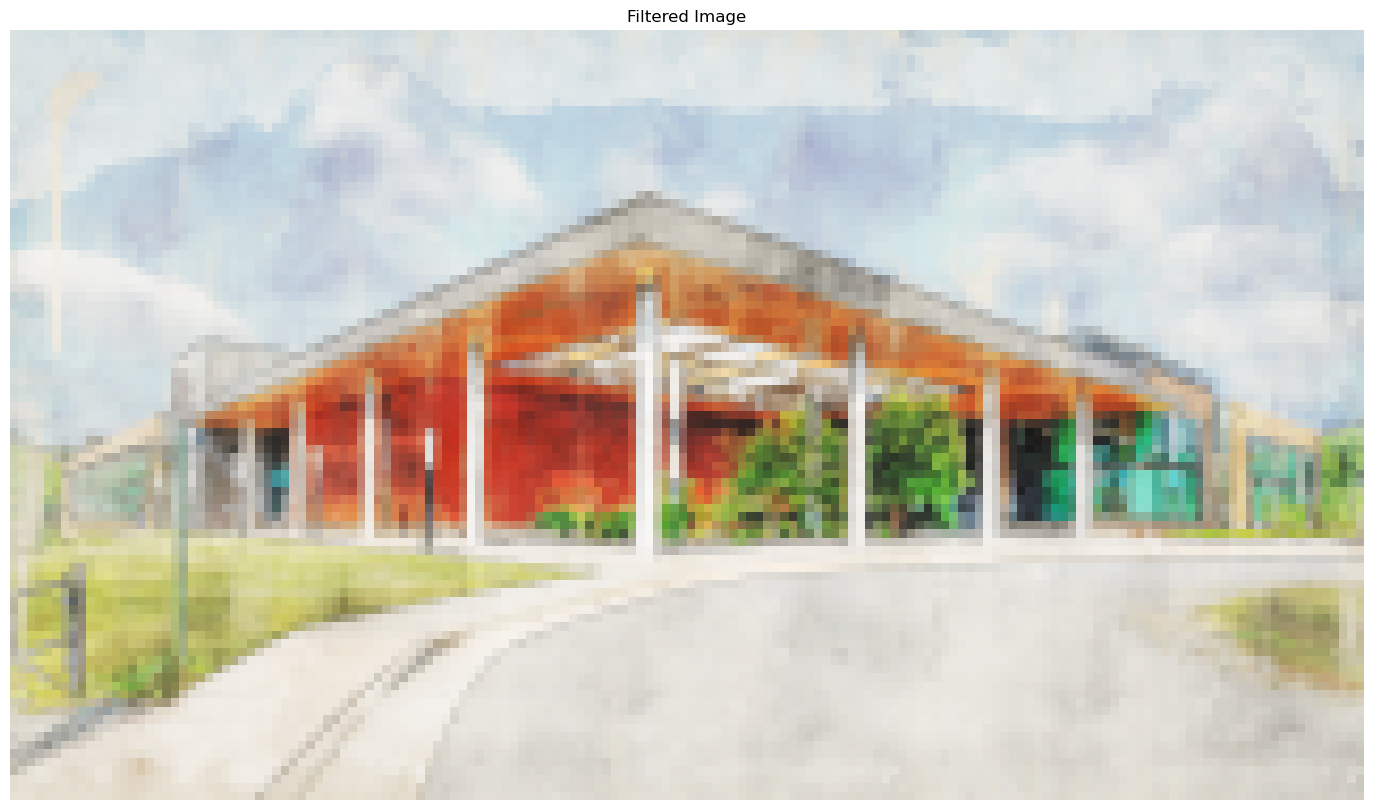

In [23]:

# Choose a kernel
k = kernel[0][0]

# Apply convolution
filtered_image = cv2.filter2D(image, -1, k)

plt.figure(figsize=(20, 10))

plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis("off")

plt.show()

Can you make a blur filter? What happens if you apply it multiple times?
What about a sharper filter applied multiple times?